In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import os, math
%matplotlib inline

(4, 30, 999)
(4, 30, 999)
(4, 30, 999)
(4, 30, 999)


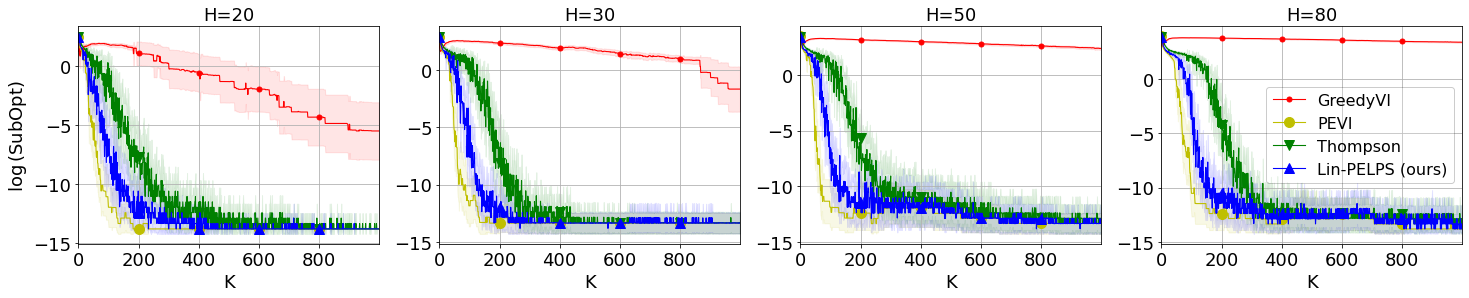

In [3]:
from re import I


Hs = [20,30,50,80] #[20,30,50,80]
fig, axs = plt.subplots(1, len(Hs), figsize=(6.2*len(Hs),4))
fs = 18
n_trials = 30 #30
markers=['.','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
# random.shuffle(markers)

labels = [ 'GreedyVI', 'PEVI', 'Thompson', 'Lin-PELPS (ours)']
colors = ['r', 'y', 'g', 'b'] #cmap(np.arange(cmap.N))
for j,H in enumerate(Hs):
    arrs_all = []
    
    ## LinGreedy
    env = 'results/linmdp-nA=100-H={}-p=0.6-n=1000/'.format(H)
    arrs = []
    for i in range(n_trials):
        fname = 'pevi-subopt-beta=0.0-lambda=0.01-run={}.npy'.format(i) 
        arr = np.load(os.path.join(env, fname))
        arrs.append(arr)

    arrs_all.append(arrs)
    
    ## LinLCB 
    env = 'results/linmdp-nA=100-H={}-p=0.6-n=1000/'.format(H)
    arrs = []
    for i in range(n_trials):
        fname = 'pevi-subopt-beta=1.0-lambda=0.01-run={}.npy'.format(i) 
        arr = np.load(os.path.join(env, fname))
        arrs.append(arr)

    arrs_all.append(arrs)


    # Lin-TS
    env = 'results/linmdp-nA=100-H={}-p=0.6-n=1000/'.format(H)
    lambd=0.01 
    env_name='H={}'.format(H)

    arrs = []
    for i in range(n_trials):
        fname = 'ts-subopt-sigma=1.0-M=20-lambda=0.01-run={}.npy'.format(i)
        arr = np.load(os.path.join(env, fname)) 
        arrs.append(arr)

    arrs_all.append(arrs)
    
    
    ##LMC 
    env = 'results/linmdp-nA=100-H={}-p=0.6-n=1000/'.format(H)
    arrs = []
    for i in range(n_trials):
        fname = 'lmc-subopt-tau=1.0-eta=1.0-M=20-lambda=0.01-run={}.npy'.format(i) 
        arr = np.load(os.path.join(env, fname))
        arrs.append(arr)

    arrs_all.append(arrs)


    # arrs = np.array(arrs) 
   
    arrs_all = np.log(np.array(arrs_all) + 1e-6)

    print(arrs_all.shape)
    n = arrs_all.shape[0]
    arrs_m = np.mean(arrs_all, axis=1) # (1,T)
    arrs_std = np.std(arrs_all, axis=1) / np.sqrt(arrs_all.shape[1])
    cmap = plt.cm.get_cmap('jet')
    
    # np.random.shuffle(colors)
    cinv = cmap.N / (1. * n) 

    xs = np.arange(arrs_all.shape[-1])

    # fig = plt.figure(figsize=(6,4))

    ind = -0.5 


    for i in range(n):
        axs[j].plot(xs, arrs_m[i], label=labels[i] ,\
            color=colors[i], marker=markers[i % len(markers)], markevery=200, linewidth=1.1, markersize=10)
            # color=colors[int((i+0.5)*cinv)], marker=markers[i % len(markers)], markevery=200, linewidth=1.1)
        axs[j].fill_between(xs, arrs_m[i] + 1.96*arrs_std[i], arrs_m[i]-1.96*arrs_std[i], \
            alpha=0.1, color=colors[i])
            # alpha=0.1, color=colors[int((i+0.5)*cinv)])


    if j == len(Hs)-1:
        legend = axs[j].legend(fontsize=16,edgecolor="black")
        legend.get_frame().set_alpha(0.2)
    axs[j].set_xlim([0, arrs_all.shape[-1]])
    # axs[j].set_ylim([0, 50])
    axs[j].grid('on')
    axs[j].set_xlabel('K', fontsize=fs)
    if j == 0:
        axs[j].set_ylabel(r'$\log$' + '(SubOpt)', fontsize=fs)
    axs[j].set_title(env_name, fontsize=fs)
    axs[j].xaxis.set_tick_params(labelsize=fs)
    axs[j].yaxis.set_tick_params(labelsize=fs)
fig.savefig('neurips_linmdp.png', bbox_inches='tight', dpi=400)